In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
model = tf.keras.models.load_model('../models/saved_model/MobileNet_3s_v3.h5')

In [23]:
image = plt.imread("Data/spectrograms/rock/00000(0).png")[:, :, 1]

image = np.repeat(image[:, :, np.newaxis], 3, axis=2)
image = np.expand_dims(image, axis=0)
image = np.transpose(image, (0, 2, 1, 3))
img_array  = tf.convert_to_tensor(image)

labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [24]:
predictions = model.predict(img_array)
print(labels[np.argmax(predictions)])
predicted_class_index = np.argmax(predictions)

1/1 [==============================] - 0s 40ms/step
rock


In [25]:
grad_model = tf.keras.models.Model([model.inputs], [model.get_layer('conv_pw_13_relu').output, model.output])

with tf.GradientTape() as tape:
    conv_output, predictions = grad_model(img_array)
    loss = predictions[:, predicted_class_index]

grads = tape.gradient(loss, conv_output)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
conv_output = conv_output[0]
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [26]:
img = cv2.imread("Data/spectrograms/rock/00000(0).png")
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
overlay_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)

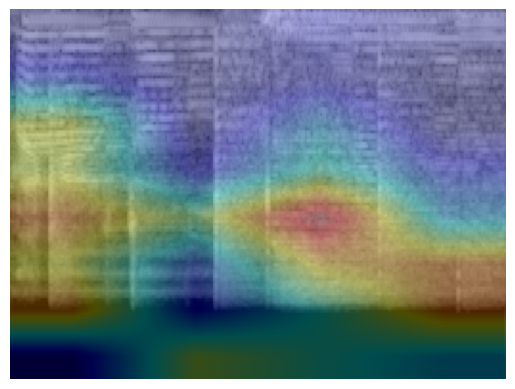

In [27]:
plt.imshow(cv2.cvtColor(overlay_img, cv2.COLOR_BGR2RGB), aspect='auto')
plt.axis('off')
plt.show()